In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv(r"C:\Users\LENOVO\Downloads\ibm-hr-analytics-employee-attrition-performance (2).zip")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
pd.set_option('max_columns', None)

In [5]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [6]:
# print the shape of df
df.shape

(1470, 35)

There are 1470 rows and 35 columns in my dataset.

In [7]:
# Checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.isnull().values.any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

As we see there are object type data available in dataset

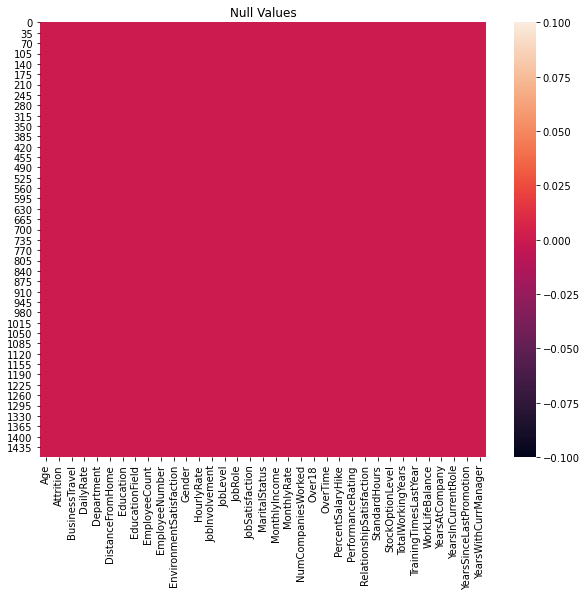

In [10]:
#Checking for null values in heat map
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [11]:
#Checking description of dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# get the count of number of employees that stayed anf left the company
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

1233 employess are currently staying in company and 237 employess left the company

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

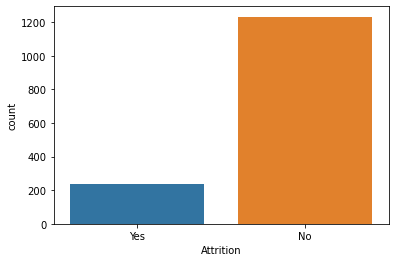

In [13]:
#lets visualise our target data
sns.countplot(df['Attrition'])

<AxesSubplot:xlabel='Age', ylabel='count'>

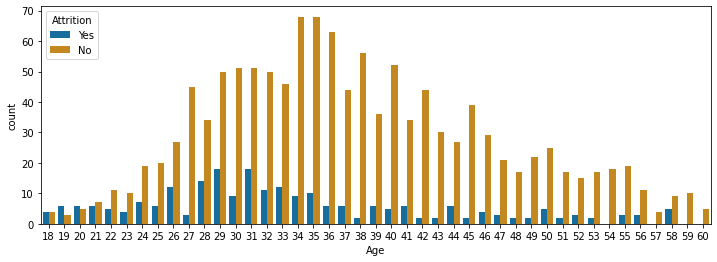

In [14]:
# show the number of empoyees that left and stay by age
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=df, palette='colorblind')

from this plot we can see no of stayed employees is more between 34-36 age and no of left employees is more between 29-31 age

In [15]:
# lets print all object type data type andd their unique values
for column in df.columns:
    if df[column].dtype== object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('*************************************************************************')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
*************************************************************************
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*************************************************************************
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
*************************************************************************
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
*********************************************************

In [16]:
df= df.drop('EmployeeNumber',axis=1)
df= df.drop('StandardHours', axis=1)
df= df.drop('EmployeeCount', axis=1)
df= df.drop('Over18', axis =1)

In [17]:
# Get the corelation
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


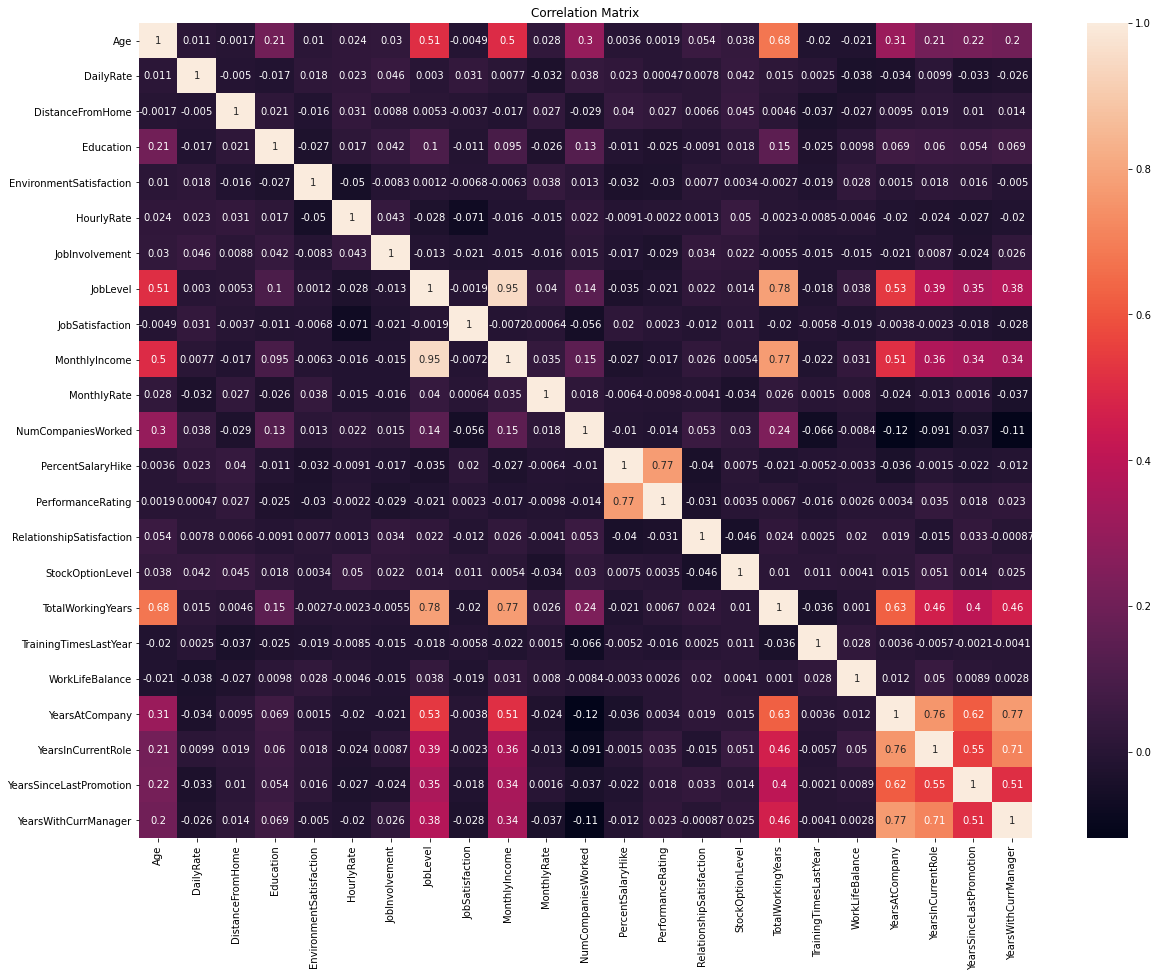

In [18]:
#Check for multicolinaeirty
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()


As we see some of the column are depend on each other like job level and monthly income are highly correalrted

#### transfrom non numerical column into numrecal column

In [19]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype== np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])    

<ipython-input-19-2d1b192e9d8c>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype== np.number:


In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


In [21]:
df.shape

(1470, 31)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

all the column now change into numerical

<AxesSubplot:xlabel='Gender', ylabel='Attrition'>

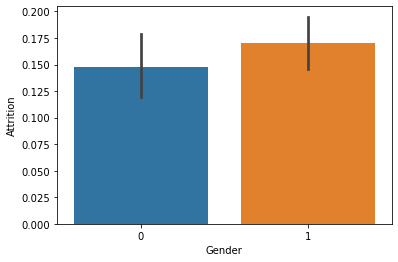

In [23]:
sns.barplot(x='Gender', y='Attrition', data=df)

From this we can see male attrition is more in the company

<AxesSubplot:xlabel='Department', ylabel='Attrition'>

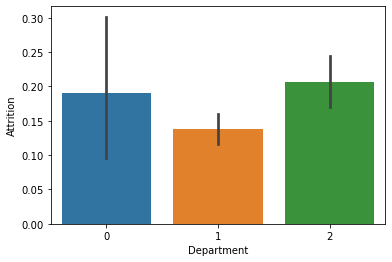

In [24]:
sns.barplot(x='Department', y='Attrition', data=df)

Human resource department has more attrition

<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

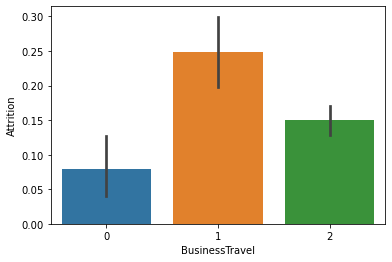

In [25]:
sns.barplot(x='BusinessTravel', y='Attrition', data=df)

Employee who travel frequently are attirited more

## Split data into X and Y

In [26]:
x= df.drop('Attrition', axis=1)
y= df['Attrition']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=99)

In [28]:
x_train.shape

(1029, 30)

In [29]:
x_test.shape

(441, 30)

In [30]:
y_test.shape

(441,)

In [31]:
y_train.shape

(1029,)

In [32]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), index= x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index= x_test.index, columns=x_test.columns)

In [33]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1143,0.868010,-2.453621,-1.160027,1.372003,1.990151,0.076672,-0.208933,-1.566169,0.830455,-0.673563,-1.027734,-0.070838,1.013633,-1.592862,-0.120057,-0.293581,1.429513,-0.677621,-0.632456,-0.087297,-0.446431,-1.558730,0.219543,-0.175686,-0.619327,0.308850,0.501714,0.766971,0.554337,0.268672
81,-0.231562,0.590111,0.990976,-0.500399,-1.011880,0.076672,0.532418,-0.655153,0.830455,-1.761703,-1.027734,-0.970749,0.605083,0.244644,1.252595,-0.933356,1.675211,-0.677621,-0.632456,0.712363,-0.446431,-1.558730,-0.963232,-0.687452,0.164544,0.308850,-0.152613,-0.053986,-0.690426,-0.012002
789,0.758053,0.590111,1.439433,-2.372800,-1.011880,-0.897348,0.532418,-0.655153,0.830455,1.255414,-1.027734,0.829072,-1.437668,-1.592862,-0.120057,1.138788,-1.674556,2.541177,-0.632456,-0.353850,-0.446431,1.181474,0.219543,1.615494,-1.403197,0.308850,2.137532,0.493319,0.243146,0.549345
16,-0.561434,0.590111,-1.167965,-0.500399,-0.531555,-0.897348,-0.950283,-1.566169,0.830455,0.711343,1.830478,-0.970749,0.605083,-0.674109,-1.492709,-0.746863,0.106148,-1.079971,1.581139,-0.886957,-0.446431,1.181474,1.402319,-0.559511,1.732286,-1.122713,-0.152613,-0.601291,-0.690426,0.268672
202,-0.341519,-0.931755,0.173436,-0.500399,0.068851,1.050693,0.532418,1.166880,0.830455,-1.118711,0.401372,-0.970749,0.605083,0.244644,-1.492709,-0.557780,-1.149102,-0.677621,1.581139,0.445810,-0.446431,1.181474,0.219543,-0.815393,0.948415,1.740413,-0.316194,-0.327638,-0.068045,-1.134694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,0.868010,0.590111,0.363931,-0.500399,2.230313,0.076672,2.015118,1.166880,0.830455,1.552179,0.401372,-0.970749,0.605083,1.163397,-0.120057,-1.523917,-1.368042,0.529428,-0.632456,1.245469,2.239987,1.181474,0.219543,-0.431569,0.164544,0.308850,-0.316194,-0.053986,-0.690426,-0.292675
1192,1.307839,0.590111,-0.874285,-0.500399,0.789339,0.076672,0.532418,1.166880,-1.204159,0.414578,0.401372,-0.970749,-1.029118,-1.592862,-1.492709,-1.156111,1.526819,0.529428,1.581139,0.179256,-0.446431,-0.645328,0.219543,0.719904,-0.619327,-1.122713,-0.806940,-0.601291,-0.068045,-0.573348
1209,2.517369,0.590111,-1.088592,-0.500399,-1.011880,1.050693,0.532418,0.255864,0.830455,1.304874,-2.456840,0.829072,-1.846218,1.163397,-1.492709,1.203543,0.887030,0.127078,-0.632456,1.245469,2.239987,0.268073,0.219543,0.975786,-0.619327,1.740413,-0.970521,-1.148595,-0.690426,-1.134694
1059,-0.231562,0.590111,-0.338519,1.372003,-0.291392,-1.871369,-0.950283,1.166880,0.830455,0.513500,0.401372,-0.970749,1.422183,0.244644,-0.120057,-1.285620,0.278867,-0.677621,-0.632456,-0.620403,-0.446431,-1.558730,0.219543,-1.327159,0.164544,0.308850,-0.970521,-1.148595,-0.690426,-1.134694


As we see value of each column has been scaled now

### 1) RandomForestClassifier

In [59]:
rf= RandomForestClassifier()
parameters = {'n_estimators':[int(x) for x in np.linspace(100,1000,10)]}
rf_classifier= GridSearchCV(rf, parameters,)
rf_classifier.fit(x_train, y_train)
print(rf_classifier.best_params_)
print(rf_classifier.best_score_)

{'n_estimators': 100}
0.8561733364906464


In [61]:
#Create the model and train
rf = RandomForestClassifier(n_estimators=700)
rf.fit(x_train,y_train)
#predict the results for test
test_pred = rf.predict(x_test)
#test the accuracy
accuracy_score(y_test, test_pred)

0.8752834467120182

## 2) LogisticRegression

In [36]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.8756073858114675


In [37]:
print('accuracy_score:', accuracy_score(LR_predict,y_test))

accuracy_score: 0.8684807256235828


## 3) DecisionTreeClassifier

In [42]:
DT= DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],
             }
DT_classifier = GridSearchCV(DT, parameters)
DT_classifier.fit(x_train, y_train)
print(DT_classifier.best_params_)

{'criterion': 'entropy'}


In [43]:
DT= DecisionTreeClassifier(criterion= 'entropy')
DT.fit(x_train, y_train)
DT_predict=DT.predict(x_test)

In [44]:
print('accuracy_score:', accuracy_score(DT_predict,y_test))

accuracy_score: 0.8049886621315193


#### saving the model

In [45]:
import pickle

In [54]:
filename= 'HR Analytics'
pickle.dump(rf, open(filename,'wb'))